In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("Anomaly Detection In NASA Turbo Fans.txt", sep=" ", header=None)

df = df.dropna(axis=1)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


In [26]:
columns = ["unit_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"]

for i in range(1, 22):
    columns.append("sensor_" + str(i))

df.columns = columns
df.head()

,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       41214 non-null  int64  
 1   cycle         41214 non-null  int64  
 2   op_setting_1  41214 non-null  float64
 3   op_setting_2  41214 non-null  float64
 4   op_setting_3  41214 non-null  float64
 5   sensor_1      41214 non-null  float64
 6   sensor_2      41214 non-null  float64
 7   sensor_3      41214 non-null  float64
 8   sensor_4      41214 non-null  float64
 9   sensor_5      41214 non-null  float64
 10  sensor_6      41214 non-null  float64
 11  sensor_7      41214 non-null  float64
 12  sensor_8      41214 non-null  float64
 13  sensor_9      41214 non-null  float64
 14  sensor_10     41214 non-null  float64
 15  sensor_11     41214 non-null  float64
 16  sensor_12     41214 non-null  float64
 17  sensor_13     41214 non-null  float64
 18  sensor_14     41214 non-nu

In [28]:
df.describe()

,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,...,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000
mean,120.006017,108.739094,24.115207,0.574725,94.072888,472.711616,579.069264,1414.951596,1197.321054,8.003346,...,265.414280,2334.733335,8063.206813,9.284664,0.023029,346.976319,2228.560392,97.766960,20.798613,12.479669
std,71.685208,83.717459,14.714512,0.308868,14.211218,26.321455,37.129671,105.423125,118.206367,3.602107,...,137.477066,127.827832,84.126742,0.744338,0.004595,27.604875,144.868684,5.354077,9.880486,5.928765
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.420000,1240.940000,1024.900000,3.910000,...,128.260000,2027.740000,7849.800000,8.204000,0.020000,302.000000,1915.000000,84.930000,10.190000,6.145300
25%,57.000000,43.000000,10.004700,0.250700,100.000000,445.000000,549.200000,1348.590000,1116.800000,3.910000,...,132.900000,2387.890000,8060.970000,8.636200,0.020000,330.000000,2212.000000,100.000000,10.890000,6.538275
50%,118.000000,91.000000,25.001500,0.700000,100.000000,462.540000,555.540000,1364.630000,1130.300000,7.050000,...,183.370000,2388.030000,8079.705000,9.261050,0.020000,334.000000,2223.000000,100.000000,14.930000,8.958850
75%,181.000000,155.000000,41.998100,0.840000,100.000000,491.190000,606.910000,1494.990000,1299.440000,10.520000,...,371.430000,2388.110000,8125.830000,9.352375,0.030000,368.000000,2324.000000,100.000000,28.580000,17.148200
max,248.000000,486.000000,42.008000,0.842000,100.000000,518.670000,643.940000,1608.050000,1429.460000,14.620000,...,536.600000,2389.220000,8196.800000,11.017000,0.030000,397.000000,2388.000000,100.000000,39.710000,23.829800


In [29]:
df.isnull().sum()

unit_id         0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

In [30]:
sensor_cols = []

for col in df.columns:
    if "sensor_" in col:
        sensor_cols.append(col)

sensor_cols

['sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21']

In [31]:
df[sensor_cols] = df[sensor_cols].fillna(df[sensor_cols].mean())

In [32]:
df = df.sort_values(["unit_id", "cycle"])
df.head()

,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


In [33]:
engine_avg = df.groupby("unit_id")[sensor_cols].mean()
engine_avg.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
unit_id,,,,,,,,,,,,,,,,,,,,,
1,473.540565,580.125696,1414.114957,1193.755478,8.023739,11.555217,281.768652,2233.585261,8519.309000,1.089478,...,265.217261,2337.888000,8057.604348,9.280000,0.022783,346.760870,2233.678261,97.903304,20.827522,12.491842
2,474.393660,580.574510,1418.621503,1201.666078,8.194575,11.809085,287.094967,2225.229673,8520.509869,1.093922,...,270.203987,2326.882680,8055.964967,9.340977,0.023007,347.751634,2225.235294,97.439085,21.152745,12.688261
3,473.160851,579.936383,1416.803191,1198.243688,8.091277,11.685461,286.886170,2234.096099,8526.915674,1.098582,...,269.973191,2339.547021,8066.640284,9.230871,0.023121,347.439716,2234.106383,97.969291,21.128936,12.671770
4,473.131394,580.734952,1417.297115,1196.373365,7.991058,11.563125,283.349952,2243.871442,8529.060913,1.096635,...,266.723125,2349.844760,8063.050096,9.228856,0.022981,347.721154,2244.024038,98.406058,20.916202,12.545607
5,469.132745,574.079216,1406.859216,1193.558039,7.574510,10.898431,264.031569,2210.324118,8477.445490,1.090000,...,248.601961,2324.557843,8060.075098,9.390867,0.023333,344.568627,2210.294118,97.340588,19.499608,11.700724


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(engine_avg)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
engine_avg["PC1"] = X_pca[:, 0]
engine_avg["PC2"] = X_pca[:, 1]

engine_avg.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,PC1,PC2
unit_id,,,,,,,,,,,,,,,,,,,,,
1,473.540565,580.125696,1414.114957,1193.755478,8.023739,11.555217,281.768652,2233.585261,8519.309000,1.089478,...,8057.604348,9.280000,0.022783,346.760870,2233.678261,97.903304,20.827522,12.491842,-0.198537,0.135512
2,474.393660,580.574510,1418.621503,1201.666078,8.194575,11.809085,287.094967,2225.229673,8520.509869,1.093922,...,8055.964967,9.340977,0.023007,347.751634,2225.235294,97.439085,21.152745,12.688261,0.510825,-1.890786
3,473.160851,579.936383,1416.803191,1198.243688,8.091277,11.685461,286.886170,2234.096099,8526.915674,1.098582,...,8066.640284,9.230871,0.023121,347.439716,2234.106383,97.969291,21.128936,12.671770,1.264973,0.331536
4,473.131394,580.734952,1417.297115,1196.373365,7.991058,11.563125,283.349952,2243.871442,8529.060913,1.096635,...,8063.050096,9.228856,0.022981,347.721154,2244.024038,98.406058,20.916202,12.545607,1.422099,1.736029
5,469.132745,574.079216,1406.859216,1193.558039,7.574510,10.898431,264.031569,2210.324118,8477.445490,1.090000,...,8060.075098,9.390867,0.023333,344.568627,2210.294118,97.340588,19.499608,11.700724,-4.842994,0.220718


In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
engine_avg["dbscan_label"] = dbscan.fit_predict(X_pca)

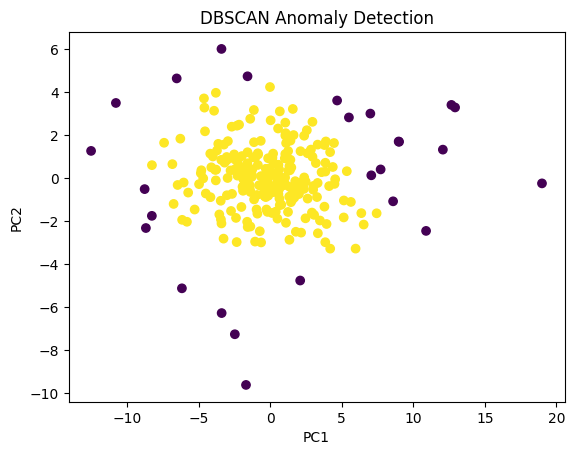

In [38]:
import matplotlib.pyplot as plt

plt.scatter(
    engine_avg["PC1"],
    engine_avg["PC2"],
    c=engine_avg["dbscan_label"]
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Anomaly Detection")
plt.show()

In [39]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
engine_avg["iso_label"] = iso.fit_predict(X_scaled)

In [40]:
anomalies = engine_avg[ (engine_avg["dbscan_label"] == -1) | (engine_avg["iso_label"] == -1) ]

anomalies.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,PC1,PC2,dbscan_label,iso_label
unit_id,,,,,,,,,,,,,,,,,,,,,
10,472.607391,580.984783,1425.633043,1208.273478,8.118696,11.806522,293.502609,2249.207826,8555.412609,1.121739,...,0.023913,349.652174,2249.173913,98.689565,21.589565,12.928848,5.506666,2.812780,-1,1
11,477.506829,585.891463,1432.547317,1218.297073,8.661829,12.562805,310.457195,2249.075244,8578.986341,1.123049,...,0.023902,351.731707,2249.073171,98.162195,22.776463,13.674126,8.594176,-1.086483,-1,1
19,479.280417,587.873750,1439.305417,1223.013333,8.957917,12.999583,321.533750,2252.031250,8592.010833,1.127500,...,0.024167,352.333333,2252.083333,98.116250,23.518333,14.104254,10.898585,-2.462001,-1,-1
28,481.573500,593.764500,1458.730500,1245.278500,9.334500,13.672000,342.487500,2282.803500,8648.685000,1.144000,...,0.024500,358.500000,2282.850000,99.246500,24.772000,14.865025,18.998975,-0.252619,-1,-1
46,465.247297,568.563784,1387.986216,1167.565946,7.099459,10.163514,243.421892,2196.786757,8425.996757,1.060000,...,0.021892,339.756757,2196.729730,97.148919,18.187838,10.902741,-12.512658,1.257073,-1,-1


In [41]:
df["anomaly"] = 0

for engine_id in anomalies.index:
    df.loc[df["unit_id"] == engine_id, "anomaly"] = 1

df.head()

,unit_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,anomaly
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0


In [42]:
df[df["anomaly"] == 1][sensor_cols].mean().head()

sensor_1     472.888652
sensor_2     579.583948
sensor_3    1417.358646
sensor_4    1200.795554
sensor_5       8.041278
dtype: float64

In [43]:
print("Total engines:", df["unit_id"].nunique())
print("Anomalous engines:", anomalies.shape[0])

Total engines: 248
Anomalous engines: 26
